<img src="https://th.bing.com/th/id/R.0b9618782d4e7062573f5983d876649a?rik=7HWDbD%2feXNOe1A&pid=ImgRaw&r=0" width=150>


**I758 Wissens- und KI-basierte Systeme**

# Explorative Datenanalyse - Teil 1: Datenqualität erkunden & korrigieren
(c) Ricardo Knauer, Raphael Wallsberger, Christina Kratsch

In der Realität sind Datensätze selten so gutartig wie unsere Maschinendaten aus der letzten Übung. Regelmäßig kommt es im Alltag zu "unerwarteten" Datenwerten. Ein guter Data Scientist verwendet deshalb einen wesentlichen Anteil seiner Zeit damit, die Qualität der Daten zu überprüfen und ggf. für die gestellte Aufgabe optimieren. Dies ist eine Wissenschaft für sich (sogenanntes *Data Engineering*), hier erhalten Sie nur einen ersten Einblick. 

Nehmen wir an, wir hätten nur eine deutlich schlechtere Messreihe zur Verfügung. Alles, was wir wissen, ist, dass mit den Daten etwas "nicht in Ordnung" ist. Wir müssen uns langsam vortasten. Die schlechte Messreihe finden Sie in einer anderen Datei:

In [2]:
import pandas as pd

df = pd.read_csv("data/machine_data_broken.csv", sep=";")
df.head()

,Maschine,Mode,Produkt,Strom / A,Drehmoment / Nm,Drehzahl / 1/min,Temp Umgebung / degC,Temp Umrichter / degC,Temp Werkzeug / degC,Bearbeitungszeit / s
0,A,2.0,X,NaN,"48,64",1463,"21,5","23,3","95,1","21,4"
1,B,2.0,Y,NaN,"50,92",1462,"20,9","22,8","98,2","24,8"
2,C,2.0,X,NaN,"46,85",1462,"21,3","23,8","93,1","21,4"
3,B,2.0,Y,NaN,"49,69",1463,"21,5","24,4","97,7",NaN
4,C,3.0,X,"26,195","53,29",1462,NaN,"25,3","104,1","19,9"


Der Datensatz ist deutlich kleiner - aber immerhin stimmt das Format:

In [3]:
df.shape

(299, 10)

Mit ```.info()``` bekommen Sie einen Einblick in die Datentypen jeder Spalte:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Maschine               299 non-null    object 
 1   Mode                   298 non-null    float64
 2   Produkt                299 non-null    object 
 3   Strom / A              285 non-null    object 
 4   Drehmoment / Nm        299 non-null    object 
 5   Drehzahl / 1/min       299 non-null    int64  
 6   Temp Umgebung / degC   298 non-null    object 
 7   Temp Umrichter / degC  298 non-null    object 
 8   Temp Werkzeug / degC   298 non-null    object 
 9   Bearbeitungszeit / s   245 non-null    object 
dtypes: float64(1), int64(1), object(8)
memory usage: 23.5+ KB


Hier zeigt sich das erste Problem: einige Werte scheinen in den Spalten zu fehlen, der ```Non-Null Count``` entspricht nämlich nicht für jede Spalte der Zeilenzahl.
Außerdem erkennen wir einen Fehler beim Einlesen der Daten: die meisten Spalten sind vom Typ ```object```. Soll heißen: Pandas erkennt nicht, dass es sich um numerische Werte handelt. Dies lässt sich einfach erklären - wir haben beim Einlesen nicht erwähnt, dass die Zahlen nicht mit der "deutschen" Schreibweise mit Komma als Trennzeichen notiert sind. Eine leidige und typische Fehlerquelle im Umgang mit Daten (die sich leider meist erst durch sehr kryptische Fehler weiter unten in den Pipeline bemerkbar macht).

Also nochmal - lassen Sie uns ```df``` nochmal überschreiben:

In [5]:
df = pd.read_csv("data/machine_data_broken.csv", sep=";", decimal=",")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Maschine               299 non-null    object 
 1   Mode                   298 non-null    float64
 2   Produkt                299 non-null    object 
 3   Strom / A              285 non-null    float64
 4   Drehmoment / Nm        299 non-null    float64
 5   Drehzahl / 1/min       299 non-null    int64  
 6   Temp Umgebung / degC   298 non-null    float64
 7   Temp Umrichter / degC  298 non-null    float64
 8   Temp Werkzeug / degC   298 non-null    float64
 9   Bearbeitungszeit / s   245 non-null    float64
dtypes: float64(7), int64(1), object(2)
memory usage: 23.5+ KB


Viel besser! Aber da ist noch das Problem mit den fehlenden Werten. die letzte Spalte (Bearbeitungszeit) und auch einige andere Spalten scheinen unter Datenfehlern zu leiden.

<span style="color:#FF5F00"><b>AUFGABE 1:</b></span><br>
Wir können es uns einfach machen. Nutzen Sie die  eingebauten Funktionen ```.isnull``` und ```.sum```, um die Nullwerte zu zählen:

In [6]:
# Ist nicht all zu triviale Anwendung von den beiden Funktionen T_T
df.isnull().sum()

Maschine                  0
Mode                      1
Produkt                   0
Strom / A                14
Drehmoment / Nm           0
Drehzahl / 1/min          0
Temp Umgebung / degC      1
Temp Umrichter / degC     1
Temp Werkzeug / degC      1
Bearbeitungszeit / s     54
dtype: int64

Die Spalte *Bearbeitungszeit / s* scheint massiv von unserem Problem betroffen. Hier fehlen so viele Werte, dass wir davon ausgehen können, dass die Spalte praktisch wertlos ist. 

<span style="color:#FF5F00"><b>AUFGABE 2:</b></span><br>
Entfernen Sie mit `del` die Spalte aus dem Data Frame!

In [7]:
del df["Bearbeitungszeit / s"]

Gut zu wissen: für komplizierte Verfahren gibt es die mächtige Funktion ```.dropna```, die Spalten anhand fester Qualitätskriterien entfernen kann. Die wollen wir hier aber heute **nicht** einsetzen. Führen Sie den auskommentierten Code NICHT aus.

In [8]:
# Drop any rows which have any NaNs 
#df.dropna(axis=0) 
# Drop columns with over 70% non-NaNs 
#df.dropna(thresh=int(df.shape[0] * .7), axis=1)

Die Spalte *Strom / A* ist uns wichtig - aber auch hier fehlen massiv Werte. Schauen wir uns die Spalte nochmal an:

In [9]:
df["Strom / A"]

0         NaN
1         NaN
2         NaN
3         NaN
4      26.195
        ...  
294    22.472
295    20.123
296    23.154
297    22.347
298    23.761
Name: Strom / A, Length: 299, dtype: float64

Pandas bietet die Funktion ```.fillna```, mit der leere Werte gefunden und neu gesetzt werden können. Zum Beispiel auf 0:

In [10]:
df['Strom / A'].fillna(0.0)

0       0.000
1       0.000
2       0.000
3       0.000
4      26.195
        ...  
294    22.472
295    20.123
296    23.154
297    22.347
298    23.761
Name: Strom / A, Length: 299, dtype: float64

<span style="color:#FF5F00"><b>AUFGABE 3:</b></span><br>
Achtung: achten Sie nochmal auf den Code der letzten Zeile, und dann schauen Sie sich nochmal die Werte in ```df``` an. Fällt Ihnen etwas auf? Wie hat sich ```df``` verändert?

In [11]:
df

,Maschine,Mode,Produkt,Strom / A,Drehmoment / Nm,Drehzahl / 1/min,Temp Umgebung / degC,Temp Umrichter / degC,Temp Werkzeug / degC
0,A,2.0,X,NaN,48.64,1463,21.5,23.3,95.1
1,B,2.0,Y,NaN,50.92,1462,20.9,22.8,98.2
2,C,2.0,X,NaN,46.85,1462,21.3,23.8,93.1
3,B,2.0,Y,NaN,49.69,1463,21.5,24.4,97.7
4,C,3.0,X,26.195,53.29,1462,NaN,25.3,104.1
...,...,...,...,...,...,...,...,...,...
294,B,2.0,Y,22.472,50.24,1461,20.6,23.9,97.5
295,A,1.0,Y,20.123,45.67,1463,21.3,22.6,90.0
296,C,2.0,X,23.154,47.19,1460,20.6,24.5,93.8
297,B,2.0,Y,22.347,49.99,1460,19.6,23.8,97.5


<span style="color:green"><b>Antwort zu AUFGABE 3:</b></span><br>

Obwohl die vorherige Zeile offensichtlich die null-Werte ersetzt hat, sind diese im `df` Objekt trotzdem in Originalform enthalten. Es ist meiner Meinung nach sehr praktisch, wenn die Originaldaten nicht jedes Mal aus der Datei neu gelesen werden müssen :D

<span style="color:#FF5F00"><b>AUFGABE 4:</b></span><br>
Noch mehr Aufgaben für Sie: wie sicher fühlen Sie sich mit Data Science? Versuchen Sie doch mal, die fehlenden Werte nicht durch 0.0, sondern durch etwas intelligenteres zu ersetzen, zum Beispiel den Mittelwert oder den Median. Schreiben sie die Spalte jetzt auch wieder in den Data Frame zurück, damit sich `df` tatsächlich ändert:

In [12]:
# Ersetze die Werte durch einfache Zuweisung
# Entweder durch den Mittelwert
df["Strom / A"] = df["Strom / A"].fillna(df["Strom / A"].mean())

# oder durch Median
# df["Strom / A"] = df["Strom / A"].fillna(df["Strom / A"].median())

<span style="color:#FF5F00"><b>AUFGABE 5:</b></span><br>
Plotten Sie nun zum Abschluss ihre Daten nochmal, zum Beispiel als Scatter Plot zwischen Strom und Drehmoment und betrachten Sie das Ergebnis Ihrer Arbeit. Vielleicht fällt Ihnen ja noch ein drittes Problem in unserem Datensatz auf? Schauen Sie mal in die "Ecken" des Plots!

<Axes: title={'center': 'Korrelationdiagramm zwischen Strom und Drehmoment'}, xlabel='Strom / A', ylabel='Drehmoment / Nm'>

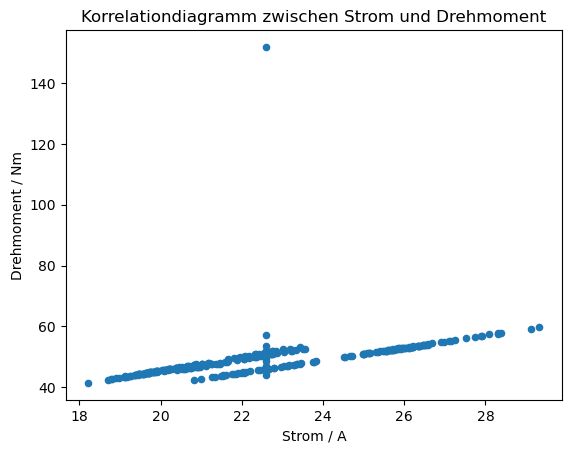

In [13]:
df.plot(kind="scatter", x="Strom / A", y="Drehmoment / Nm", title="Korrelationdiagramm zwischen Strom und Drehmoment")

<span style="color:green"><b>Antwort zu AUFGABE 5:</b></span><br>

Auf dem Plot werden einige Sachen auffällig:

1. Die Ausreisser an den Grenzen vom Wertebereich, sowie ein in der Mitte
2. Wertenlücke bei Strom = 24 A und Drehmoment = 50 Nm
3. Die ersetzte null-Werte zeigen sich deutlich als vertikale Linie in der Mitte

# Explorative Datenanalyse - Teil 2: Daten skalieren und verarbeiten mit `scikit learn`
(c) Christina Kratsch

Viele Machine Learning Algorithmen machen Annahmen über ihre Daten, z.B. über die zugrundeliegende statistische Verteilung, den Wertebereich oder den Datentyp. Die Data Science Bibliothek `scikit learn` bietet neben einer extrem umfangreichen Sammlung an Algorithemn (und einer exzellenten Dokumentation) auch mit `sklearn.preprocessing` eine Bibliothek zur Vorverarbeitung von Daten.

## Skalieren und Normalisieren

Zuerst importieren wir die notwendigen Bibliotheken und laden unsere Daten.

In [14]:
import numpy as np
# Das Package heisst scikit-learn (anaconda + pip)
from sklearn import preprocessing

# Angenommen, dies sind unsere Daten
X_train = np.array([[1., -1., 2.],
                    [2., 0., 0.],
                    [0., 1., -1.]])

Die Standardisierung von Datensätzen ist eine gängige Anforderung für viele Machine-Learning-Schätzer. Sie könnten sich schlecht verhalten, wenn die einzelnen Merkmale nicht mehr oder weniger wie standardnormalverteilte Daten aussehen: Gaussian mit Null-Mittelwert und Einheitsvarianz.

<span style="color:#FF5F00"><b>AUFGABE 6:</b></span><br>
Überlegen Sie einen Moment, was ein Grund sein könnte, warum die Syntax des `StandardScaler` so umständlich ist. Schauen Sie ggf. auch in der [Dokumentation](https://scikit-learn.org/stable/modules/preprocessing.html) nach!

In [15]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_scaled = scaler.transform(X_train)
print(X_scaled)

[[ 0.         -1.22474487  1.33630621]
 [ 1.22474487  0.         -0.26726124]
 [-1.22474487  1.22474487 -1.06904497]]


<span style="color:green"><b>Antwort zu AUFGABE 6:</b></span><br>

Meinen Programmierungskenntnissen nach ist der Syntax nicht allzu umständlich. Zuerst erstellt man einen Skalierer anhand der Daten und mit seiner Hilfe skaliert diese, um sie anscheinend zu standartisieren.
Da ich kein Statistiker bin, verlange ich mich weiter auf die Dokumentation vom `scikit`. Der Dokumentation nach muss ein Skalierer zuerst den Mittelwert und die Varianz der Datenreihen berechnen, um später damit Daten standartisieren zu können. Nach der Standartisierung werden der Mittelwert gleich Null und die Varianz gleich Eins.

<span style="color:#FF5F00"><b>AUFGABE 7:</b></span><br>
Legen Sie eine Kopie `df_num` Ihres Data Frames an. Nutzen Sie den StandardScaler, um alle Werte darin zu normalisieren. Funktioniert das? Was fällt Ihnen auf? Korrigieren Sie ggf. `df_num` entsprechend. Wie gehen Sie mit der Spalte `mode` um?

In [16]:
# Zur Sicherheit kopiere die Daten
df_num = df.copy()
# und entferne die nicht konvertierbare Merkmale :)
del df_num["Maschine"]
del df_num["Produkt"]

# Fuer jeden Merkmal:
for feature in df_num:
    # Lasse die Mode spalte unverändert,
    # damit sie noch verständlich bleibt
    if feature == "Mode":
        continue
    
    # Nehme einen Merkmal als DataFrame (notwendig für den Skalierer)
    feature_df = pd.DataFrame(df_num[feature])
    # Berechne die Mittelwerte und Varianzen
    scaler = preprocessing.StandardScaler().fit(feature_df)
    # und standartisiere die Daten
    df_num[feature] = scaler.transform(feature_df)

print(df_num)

     Mode     Strom / A  Drehmoment / Nm  Drehzahl / 1/min  \
0     2.0  1.400319e-15        -0.061467          1.084738   
1     2.0  1.400319e-15         0.261140          0.572358   
2     2.0  1.400319e-15        -0.314742          0.572358   
3     2.0  1.400319e-15         0.087102          1.084738   
4     3.0  1.416910e+00         0.596481          0.572358   
..    ...           ...              ...               ...   
294   2.0 -5.052787e-02         0.164924          0.059978   
295   1.0 -9.763973e-01        -0.481705          1.084738   
296   2.0  2.182857e-01        -0.266634         -0.452402   
297   2.0 -9.979721e-02         0.129550         -0.452402   
298   2.0  4.575376e-01        -0.091181         -0.452402   

     Temp Umgebung / degC  Temp Umrichter / degC  Temp Werkzeug / degC  
0                0.401101              -0.435613             -0.063162  
1               -0.038071              -0.897580              0.462504  
2                0.254710           

<span style="color:green"><b>Antwort zu AUFGABE 7:</b></span><br>

Zuerst hat es nicht funktioniert, weil die Merkmale `Maschine` und `Produkt` nicht konvertierbar sind. Die einfachste Lösung ist, diese außer Betracht zu lassen (_alternativ könnte man sie duch Zahlen ersetzen_).
Um den DataFrame in einer nachvollziebaren Form zu behalten, bin ich jeden Merkmal durchgegangen und habe diese separat standartisiert. Da der `NormalScaler` keine Reihen akzeptiert, musste ich jeden dieser Merkmale erst als neuen DataFrame darstellen.

Im Endeffekt sieht man, dass alle Werte in Gleitkommazahlen verwandelt wurden. Die Reihe vom `Strom` hat die kleinsten (negativen) Graden von Exponenten.

Die Spalte `Mode` habe ich unverändert gelassen, weil ich ihre Standartisierung nicht optimal finde (_kann mich auch irren_). 

Manchmal möchte man Daten in einem bestimmten Wertebereich (z.B. [0, 1]) haben, z.B. um sie als Wahrscheinlichkeiten interpretieren zu können. Auch dafür bietet `sklearn.preprocessing` Möglichkeiten:

In [17]:
X_train = np.array([[1., -1., 2.],
                    [2., 0., 0.],
                    [0., 1., -1.]])

min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_train_minmax

array([[0.5       , 0.        , 1.        ],
       [1.        , 0.5       , 0.33333333],
       [0.        , 1.        , 0.        ]])

<span style="color:#FF5F00"><b>AUFGABE 8:</b></span><br>Skalieren Sie die Einträge in `df_num` auf den Wertebereich [-3, 3]!

In [18]:
# Skaliere die Daten analog zum Code aus der Aufgabe vorher
for feature in df_num:
    if feature == "Mode":
        continue
    
    feature_df = pd.DataFrame(df_num[feature])
    df_num[feature] = preprocessing.MinMaxScaler(
                                        feature_range=(-3, 3)
                                    ).fit_transform(feature_df)

print(df_num)

     Mode  Strom / A  Drehmoment / Nm  Drehzahl / 1/min  Temp Umgebung / degC  \
0     2.0  -0.634361        -2.608188          0.818182             -0.214286   
1     2.0  -0.634361        -2.484286          0.272727             -0.642857   
2     2.0  -0.634361        -2.705461          0.272727             -0.357143   
3     2.0  -0.634361        -2.551128          0.818182             -0.214286   
4     3.0   1.307554        -2.355493          0.272727                   NaN   
..    ...        ...              ...               ...                   ...   
294   2.0  -0.703610        -2.521239         -0.272727             -0.857143   
295   1.0  -1.972540        -2.769586          0.818182             -0.357143   
296   2.0  -0.335194        -2.686985         -0.818182             -0.857143   
297   2.0  -0.771135        -2.534825         -0.818182             -1.571429   
298   2.0  -0.007293        -2.619600         -0.818182             -1.571429   

     Temp Umrichter / degC 

## Umgang mit kategorischen Variablen

Wir haben noch einige Spalten in unseren Maschinendaten, die wir nicht adressiert haben: die kategorischen Werte wie z.B. die Produkt-Klasse. Manche ML-Verfahren können aber grundsätzlich nur mit numerischen Werten umgehen. 

Die einfachste Möglichkeit, Kategorien in Zahlen umzuwandeln, ist, diese einfach zu "übersetzen", wie es im folgenden Beispiel mit drei Variablen passiert:

In [19]:
enc = preprocessing.OrdinalEncoder()
X = [['male', 'from US', 'uses Safari'], ['female', 'from Europe', 'uses Firefox']]
enc.fit(X)
enc.transform([['female', 'from US', 'uses Safari']])

array([[0., 1., 1.]])

<span style="color:#FF5F00"><b>AUFGABE 9:</b></span><br>
Erweitern Sie das Beispiel um weitere Belegungen (zum Beispiel das Geschlecht _non_binary_ oder die Herkunft _from Korea_) und kodieren Sie eine Beispiel-Belegung.

In [20]:
X.append(['transandrogynous', 'from Iraq', 'uses Internet Explorer'])
X.append(['sapphogender', 'from Australia', 'doesn\'t use anything'])
enc.fit(X)
enc.transform(X)

array([[1., 3., 3.],
       [0., 1., 1.],
       [3., 2., 2.],
       [2., 0., 0.]])

<span style="color:#FF5F00"><b>AUFGABE 10:</b></span><br>
Was passiert, wenn einer der Werte nicht definiert ist (nutzen Sie `np.nan`)? Was macht die Belegung  `encoded_missing_value`?

In [21]:
X.append(['sapphogender', 'from Australia', np.nan])
enc.fit(X)
enc.transform(X)

array([[ 1.,  3.,  3.],
       [ 0.,  1.,  1.],
       [ 3.,  2.,  2.],
       [ 2.,  0.,  0.],
       [ 2.,  0., nan]])

<span style="color:green"><b>Antwort zu AUFGABE 10:</b></span><br>

Zunächst werden nicht difinierte Werte einfach nicht betrachtet. Dafür sorgt der Parameter `encoded_missing_value` vom `OrdinalEncoder`, dessen Default-Wert genau `np.nan` ist.

<span style="color:#FF5F00"><b>AUFGABE 11:</b></span><br>Zum Schluss wird es nochmal kniffelig. Informieren Sie sich, was ein [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder) macht und kodieren Sie eine kategorische Spalte unseres Maschinendatensatzes (`df`). Achten Sie, wenn möglich, auch darauf, was mit fehlenden Werten passiert!

In [43]:

#* Siehe dieses StackOverflow um den
#* 'valid feature names' Fehler zu beheben:
#* https://stackoverflow.com/a/69378867

# Erstelle den Encoder
ohEnc = preprocessing.OneHotEncoder(
            # Mit dem Parameter werden Kategorien in
            # gewönlichen Vektoren ausgegeben
            sparse_output=False
        )

# Bereite die Testreihe vor
feature_df = pd.DataFrame(df["Maschine"])

# Füttere die Testreihe dem Encoder
ohEnc.fit(feature_df.values)
# Zusätlich schaue die Kategorien
print(f"Originale Kategorien:\n{ohEnc.categories_}\n")
# und die Werte von jeder an
print(f"Transformierte Kategorien:\n{ohEnc.transform([['A'], ['B'], ['C']])}")

# Hier kommt der ValueError: Found unknown categories
# print(ohEnc.transform([['D']]))

Originale Kategorien:
[array(['A', 'B', 'C'], dtype=object)]

Transformierte Kategorien:
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


<span style="color:green"><b>Antwort zu AUFGABE 11:</b></span><br>

Der `OneHotEncoder` bringt kategorische Werte in eine einheitliche Form von binären Vektoren mit der Länge gleich `1`. Auf dieser Weise werden solche kategorische Werte in ML gebrauchbar gemacht.

Klasse! Sie haben jetzt einen grundlegenden Überblick über die Möglichkeiten zur Manipulation von Daten gewonnen. Nicht alle Methoden erscheinen Ihnen vielleicht jetzt bereits umfassend sinnvoll - wenn wir weiter voranschreiten, werden Sie aber viele ML-Algorithmen kennenlernen, die auf den hier genannten Verfahren aufbauen. Wenn die Qualität Ihres ML-Tools einmal nicht gut ist, kehren Sie in dieses Tutorial zurück und überlegen Sie, wie Sie vielleicht die Ausgangsdaten "optimieren" können!